# KAMIKAZE Pool Report

## Table of Contents

1. [Assignees](#Assignees)
    * [Since Creation](#Since-creation)
    * [Per Week](#Per-week)
2. [Tag Related](#Tag-related)
    * [Since creation](#Since-creation)
    * [Top 5 tags since creation](#Top-5-tags-since-creation)

In [47]:
from urllib.request import Request, urlopen
import json
import pandas as pd
import itertools

In [7]:
COOKIE = 'lang_pref=en; _ga=GA1.2.1416690212.1542720478; _gaexp=GAX1.2.in5y_1ubT--YS9vbKucGEQ.17934.0!JF2DnSL3QxqJ9mYHYEsksA.17948.0; asana_orig_attr=%7B%22source%22%3A%22%22%2C%22query_string%22%3A%22%22%2C%22exit_page%22%3A%22%2F%22%2C%22landing_page%22%3A%22%2F%22%2C%22useragent%22%3A%22Mozilla%2F5.0%20(X11%3B%20Linux%20x86_64)%20AppleWebKit%2F537.36%20(KHTML%2C%20like%20Gecko)%20Chrome%2F69.0.3497.100%20Safari%2F537.36%22%2C%22timestamp%22%3A1542720479%2C%22convNum%22%3A184077389%7D; _mhbktsv=dbm; _gcl_au=1.1.705567108.1542720481; last_domain=2653227806782; p=0; optimizelyEndUserId=oeu1543865286842r0.936769239108139; optimizelySegments=%7B%22175086470%22%3A%22search%22%2C%22175122859%22%3A%22gc%22%2C%22175132201%22%3A%22false%22%2C%226118411233%22%3A%22none%22%7D; optimizelyBuckets=%7B%7D; asana_experiments={}; NaN_hash=a9c129b1PYDVOSJX1543865291117; xsrf_token=34fdc25ae5e8a5fcd227e080aa8e5cf7%3A1543930315132; user=421257675580403; auth_token=876ecb3d846735afda24e29f36075ecd; ticket=585a50e7019cdb6decb20b91f33aa790ac1a76a6a461fee40c6ac00d54f55e36; is_logged_in=true; luna_db_server_query_string=userId=421257675580403&shardId=2653227806782; server=prod-ws163.ec2|XAltM'

In [8]:
def request_json(url):
    request = Request(url)
    request.add_header('Content-Type', 'application/json')
    request.add_header('Cookie', COOKIE)

    data = json.loads(urlopen(request).read().decode('utf-8'))
    return data

In [9]:
def get_assignees(base_dataframe):
    assignee_list = list(json.loads(base_dataframe.assignee.to_json()).values())
    assignee_df = pd.read_json(json.dumps(list(filter(None.__ne__, assignee_list))))
    return assignee_df

In [11]:
data = request_json('https://app.asana.com/api/1.0/projects/680563298779433/tasks?opt_pretty&opt_expand=(this%7Csubtasks%2B)')

In [12]:
data.get('data')[0]

{'assignee': None,
 'assignee_status': 'upcoming',
 'completed': False,
 'completed_at': None,
 'created_at': '2018-07-02T21:03:24.112Z',
 'custom_fields': [{'enabled': True,
   'gid': '207648931279186',
   'id': 207648931279186,
   'name': 'Estimate',
   'number_value': None,
   'precision': 0,
   'resource_subtype': 'number',
   'resource_type': 'custom_field',
   'type': 'number'},
  {'enabled': True,
   'gid': '326509860716922',
   'id': 326509860716922,
   'name': 'Time spent',
   'number_value': None,
   'precision': 1,
   'resource_subtype': 'number',
   'resource_type': 'custom_field',
   'type': 'number'},
  {'enabled': True,
   'enum_options': [{'color': 'pink',
     'enabled': True,
     'gid': '839796772462332',
     'id': 839796772462332,
     'name': 'Backlog',
     'resource_type': 'enum_option'},
    {'color': 'cool-gray',
     'enabled': True,
     'gid': '833194452969145',
     'id': 833194452969145,
     'name': 'Baixa',
     'resource_type': 'enum_option'},
    {'co

In [13]:
df = pd.read_json(json.dumps(data.get('data')))
df.head()

,assignee,assignee_status,completed,completed_at,created_at,custom_fields,due_at,due_on,followers,gid,...,num_hearts,num_likes,parent,projects,resource_subtype,resource_type,start_on,subtasks,tags,workspace
0,None,upcoming,False,NaT,2018-07-02 21:03:24.112,"[{'id': 207648931279186, 'name': 'Estimate', '...",NaT,None,"[{'gid': '633968712880933', 'resource_type': '...",730452261753984,...,0,0,None,"[{'gid': '680563298779433', 'resource_type': '...",section,task,None,[],[],"{'gid': '2653227806782', 'resource_type': 'wor..."
1,"{'gid': '421257675580403', 'resource_type': 'u...",inbox,True,2018-10-19 19:22:16.621,2018-10-17 12:37:55.024,"[{'id': 207648931279186, 'name': 'Estimate', '...",NaT,None,"[{'gid': '633968712880933', 'resource_type': '...",820637064816196,...,0,0,"{'gid': '684409696069679', 'resource_type': 't...","[{'gid': '680563298779433', 'resource_type': '...",default_task,task,None,"[{'completed_at': '2018-10-18T19:09:23.318Z', ...","[{'gid': '22125825955790', 'resource_type': 't...","{'gid': '2653227806782', 'resource_type': 'wor..."
2,"{'gid': '662420552271652', 'resource_type': 'u...",inbox,True,2018-10-26 22:25:27.792,2018-10-23 14:06:41.498,"[{'id': 207648931279186, 'name': 'Estimate', '...",NaT,None,"[{'gid': '633968712880933', 'resource_type': '...",878362291588530,...,0,0,"{'gid': '684409696069679', 'resource_type': 't...","[{'gid': '680563298779433', 'resource_type': '...",default_task,task,None,[],"[{'gid': '22125825955790', 'resource_type': 't...","{'gid': '2653227806782', 'resource_type': 'wor..."
3,"{'gid': '633968712880933', 'resource_type': 'u...",inbox,True,2018-12-03 18:59:25.032,2018-11-29 19:36:45.448,"[{'id': 207648931279186, 'name': 'Estimate', '...",NaT,None,"[{'gid': '633968712880933', 'resource_type': '...",928216055716059,...,0,0,"{'gid': '898807941571417', 'resource_type': 't...","[{'gid': '680563298779433', 'resource_type': '...",default_task,task,None,[],"[{'gid': '12438359298694', 'resource_type': 't...","{'gid': '2653227806782', 'resource_type': 'wor..."
4,"{'gid': '517130048139702', 'resource_type': 'u...",inbox,True,2018-10-25 20:37:43.776,2018-10-25 18:35:11.589,"[{'id': 207648931279186, 'name': 'Estimate', '...",NaT,None,"[{'gid': '517130048139702', 'resource_type': '...",883197588138604,...,0,0,"{'gid': '684409696069679', 'resource_type': 't...","[{'gid': '680563298779433', 'resource_type': '...",default_task,task,None,[],"[{'gid': '22125825955790', 'resource_type': 't...","{'gid': '2653227806782', 'resource_type': 'wor..."


In [14]:
df.describe()

,gid,id,num_hearts,num_likes
count,5.090000e+02,5.090000e+02,509.000000,509.000000
mean,8.289023e+14,8.289023e+14,0.005894,0.005894
std,8.711462e+13,8.711462e+13,0.076621,0.076621
min,5.364914e+14,5.364914e+14,0.000000,0.000000
25%,7.702331e+14,7.702331e+14,0.000000,0.000000
50%,8.503038e+14,8.503038e+14,0.000000,0.000000
75%,9.072013e+14,9.072013e+14,0.000000,0.000000
max,9.374155e+14,9.374155e+14,1.000000,1.000000


In [15]:
week_completed_df = df[(df['completed_at'] > '2018-12-01') & (df['completed_at'] < '2019-08-01')]

In [16]:
assignee_df = get_assignees(df)
assignee_df.head()

,gid,id,name,resource_type
0,633968712880933,633968712880933,Caio Amaral,user
1,421257675580403,421257675580403,Luan Araldi,user
2,421257675580403,421257675580403,Luan Araldi,user
3,547404614034527,547404614034527,Felipe Becker,user
4,448820047664335,448820047664335,giancarlo.freitas,user


# 1 - Assignees

## 1.1 Since creation

In [17]:
assignee_df['name'].value_counts()

Jhonatan Tomimatsu                 83
Caio Amaral                        58
Luan Araldi                        46
Denise Giubilei                    42
Eduardo                            39
Karen Costa                        34
Anderson Silva                     28
Gleice Souza                       25
Felipe Becker                      18
Guilherme Pries                    13
Carlos Eduardo Libardo              9
raphael.ribeiro                     6
William Silva Godoy                 6
Cássio Couto                        5
Weslley Azevedo                     5
Tácio Medeiros                      3
Heron Monteiro                      3
Ivanildo de Castro                  3
Marcos Siqueira Junior              2
Cássio Böck                         2
juliana                             2
Victor Oliveira                     2
giancarlo.freitas                   2
Felipe Bremer de Moraes             2
Marta                               2
Tyller Jor'El                       2
janiel.santo

In [18]:
assignee_df['name'].value_counts().plot(kind='barh', figsize=(10, 15))

## 1.2 Per week

In [19]:
assignees_week_completed_df = get_assignees(week_completed_df)
assignees_week_completed_df.head()

,gid,id,name,resource_type
0,354706923192815,354706923192815,Denise Giubilei,user
1,354706923192815,354706923192815,Denise Giubilei,user
2,354706923192815,354706923192815,Denise Giubilei,user
3,208319495637564,208319495637564,Eduardo,user
4,771731756164271,771731756164271,Anderson Silva,user


In [20]:
assignees_week_completed_df['name'].value_counts()

Anderson Silva        6
Caio Amaral           6
Jhonatan Tomimatsu    4
Denise Giubilei       4
Eduardo               3
Gleice Souza          3
Luan Araldi           1
Karen Costa           1
Name: name, dtype: int64

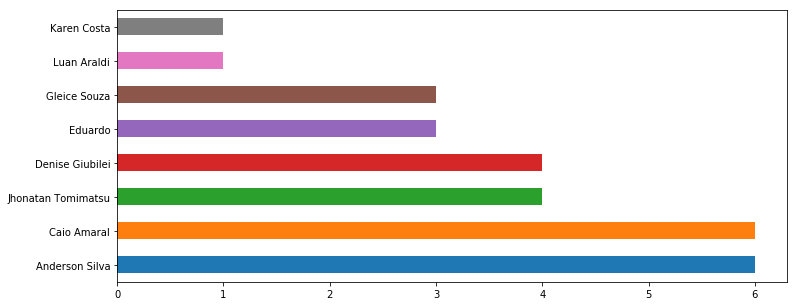

In [21]:
assignees_week_completed_df['name'].value_counts().plot(kind='barh', figsize=(12, 5))

# 2 Tag Related

In [71]:
def get_tags(base_dataframe):
    tags_list = list(json.loads(base_dataframe.tags.to_json()).values())
    tags_df = pd.read_json(json.dumps(list(filter(None.__ne__, list(itertools.chain(*tags_list))))))
    return tags_df

## 2.1 Since creation

In [79]:
tags_df = get_tags(df)
tags_df['name'].value_counts().iloc[1:]

rework                     133
CC:OnSite                  122
CC:Busca                   120
CC:Base                    118
CC:Mail                     78
CC:API                       7
VTEX                         5
CC:ColabINT                  4
Engage: NotProblem           4
DS: P1                       3
DS: Sprint 10 (H2-2018)      3
DS: Unplanned                3
CC:Banners                   2
DS: Mail                     2
rework_Cliente               2
DS: Sprint 4 (H2-2018)       1
DS: P2                       1
Engage: P0                   1
CC:Percycle                  1
atraso                       1
CC:OutOfScope                1
DS: Vitrines                 1
CC:Problem                   1
Name: name, dtype: int64

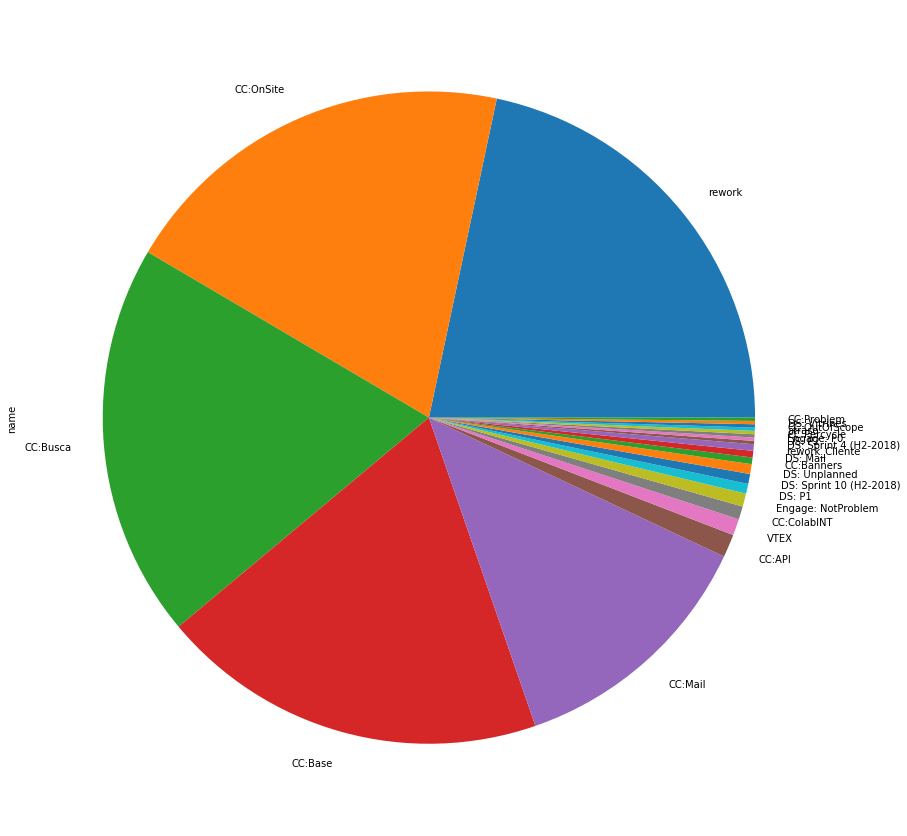

In [83]:
tags_df['name'].value_counts().iloc[1:].plot(kind='pie', figsize=(15, 15))

## 2Top 5 tags since creation

In [86]:
tags_df['name'].value_counts().iloc[1:].nlargest(6)

rework       133
CC:OnSite    122
CC:Busca     120
CC:Base      118
CC:Mail       78
CC:API         7
Name: name, dtype: int64

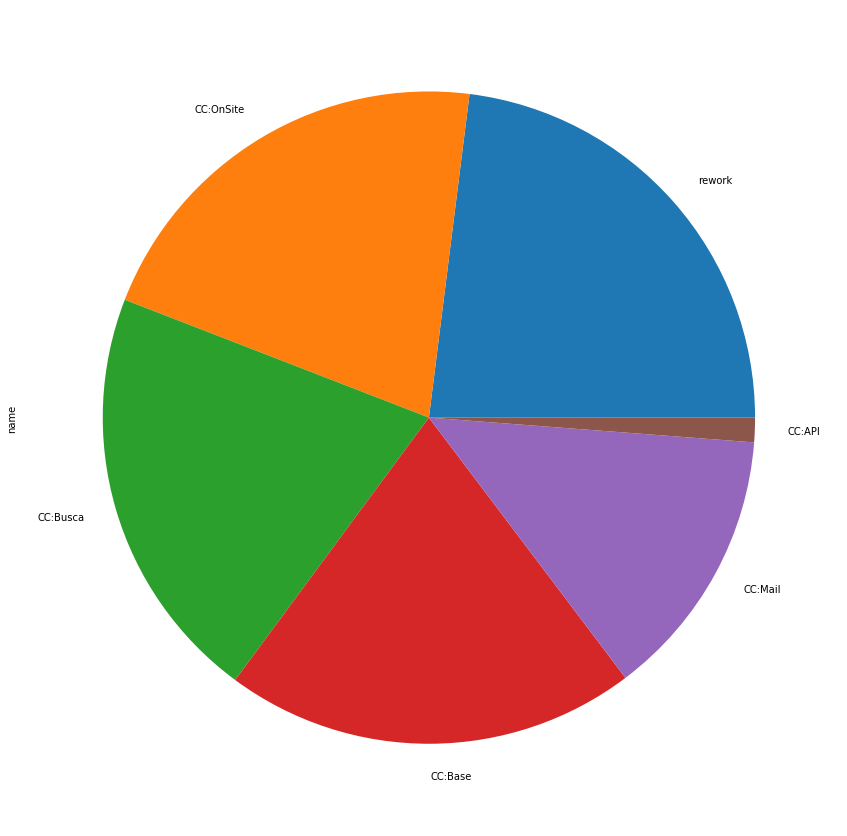

In [87]:
tags_df['name'].value_counts().iloc[1:].nlargest(6).plot(kind='pie', figsize=(15, 15))